In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras.backend as K
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD, Adagrad, RMSprop
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler
%matplotlib inline

# Linear Algebra with Numpy

In [2]:
a = np.array([1,2,3,4])

In [3]:
print(a)
print(type(a))

[1 2 3 4]
<class 'numpy.ndarray'>


In [4]:
A = np.array([[3,1,2],[2,3,4]])
B = np.array([[0,1],[2,3],[4,5]])
C = np.array([[0,1],[2,3],[4,5],[0,1],[2,3],[4,5]])

In [5]:
print("A is an {} array".format(A.shape))
print("B is an {} array".format(B.shape))
print("C is an {} array".format(C.shape))

A is an (2, 3) array
B is an (3, 2) array
C is an (6, 2) array


In [6]:
A[0]

array([3, 1, 2])

In [7]:
A[0,2]

2

In [8]:
B[1,1]

3

In [9]:
C[3,1]

1

In [10]:
C[2:]

array([[4, 5],
       [0, 1],
       [2, 3],
       [4, 5]])

In [11]:
C[2:4]

array([[4, 5],
       [0, 1]])

In [12]:
A*4

array([[12,  4,  8],
       [ 8, 12, 16]])

In [13]:
A*A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [14]:
A+A

array([[6, 2, 4],
       [4, 6, 8]])

In [15]:
A/A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [16]:
A-A

array([[0, 0, 0],
       [0, 0, 0]])

In [17]:
#A-B

In [18]:
#A*B

# Dot Product

In [19]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
np.dot(A,B)

array([[10, 16],
       [22, 31]])

In [22]:
np.dot(B, A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [23]:
print(A.shape)
print(C.shape)

(2, 3)
(6, 2)


In [24]:
#A.dot(C) #(2,3).(6,2) doesn't work

In [25]:
C.dot(A) #(6,2).(2,3) works and gives a (6,3)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

# tensors

In [26]:
x = np.array(12)

In [27]:
x

array(12)

In [28]:
x.ndim

0

In [29]:
x = np.array([12, 3, 6, 14])

In [30]:
x.ndim

1

In [31]:
x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])

In [32]:
x.ndim

2

In [33]:
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                    [[5, 78, 2, 34, 0],
                     [6, 79, 3, 35, 1],
                    [7, 80, 4, 36, 2]],
                    [[5, 78, 2, 34, 0],
                     [6, 79, 3, 35, 1],
                     [7, 80, 4, 36, 2]]])

In [34]:
x.ndim

3

In [35]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
#train_images[4,]

In [38]:
digit = train_images[4]

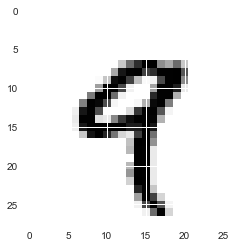

In [39]:
plt.imshow(digit, cmap=plt.cm.binary)

In [40]:
my_slice = train_images[10:100]
print(my_slice.shape) # 90 samples of 28x28

(90, 28, 28)


In [41]:
my_slice = train_images[10:100, :, :] # same as above
my_slice.shape

(90, 28, 28)

In [42]:
my_slice = train_images[10:100, 0:28, 0:28] # also same as above
my_slice.shape

(90, 28, 28)

# Gradient Descent: Bank Notes

In [2]:
df = pd.read_csv("../data/banknotes.csv")

In [3]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variace     1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,variace,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


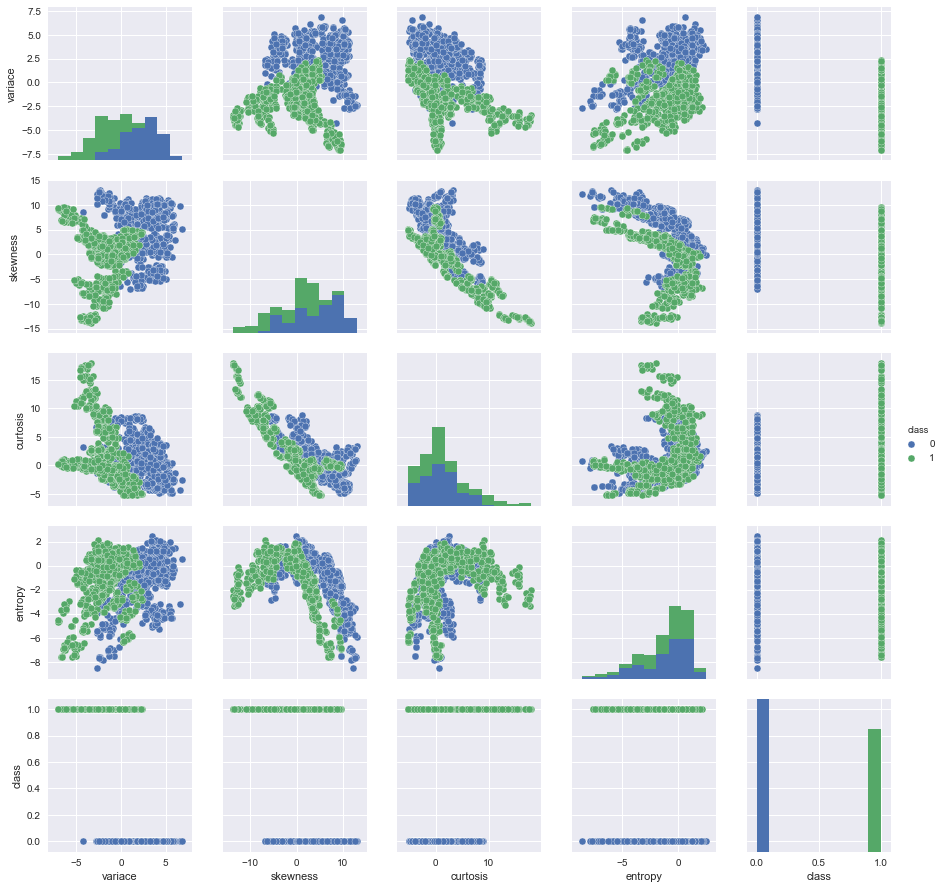

In [6]:
plt.figure(figsize=(8,8));
sns.pairplot(df, hue="class");

In [7]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [9]:
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
print(cross_val_score(rf_model, X, y))
print(cross_val_score(gb_model, X, y))

[ 0.99344978  0.99343545  0.99562363]
[ 0.99781659  0.98905908  0.99781182]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
K.clear_session() # Destroys the current TF graph and creates a new one.
model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20) # save the accuracy and loss and create a df below
result = model.evaluate(X_test, y_test)

Epoch 1/20
960/960 [==============================] - 0s - loss: 1.0031 - acc: 0.2812     
Epoch 2/20
960/960 [==============================] - 0s - loss: 0.8842 - acc: 0.3292     
Epoch 3/20
960/960 [==============================] - 0s - loss: 0.7875 - acc: 0.4125     
Epoch 4/20
960/960 [==============================] - 0s - loss: 0.7100 - acc: 0.5500     
Epoch 5/20
960/960 [==============================] - 0s - loss: 0.6484 - acc: 0.6229     
Epoch 6/20
960/960 [==============================] - 0s - loss: 0.5987 - acc: 0.6865     
Epoch 7/20
960/960 [==============================] - 0s - loss: 0.5583 - acc: 0.7656     
Epoch 8/20
960/960 [==============================] - 0s - loss: 0.5249 - acc: 0.8031     
Epoch 9/20
960/960 [==============================] - 0s - loss: 0.4969 - acc: 0.8375     
Epoch 10/20
960/960 [==============================] - 0s - loss: 0.4729 - acc: 0.8594     
Epoch 11/20
960/960 [==============================] - 0s - loss: 0.4523 - acc: 0.8719   

In [13]:
history_df = pd.DataFrame(history.history, index=history.epoch)

In [14]:
history_df.head()

,acc,loss
0,0.281250,1.003137
1,0.329167,0.884244
2,0.412500,0.787538
3,0.550000,0.710043
4,0.622917,0.648412


In [15]:
result

[0.34954965548607908, 0.91990291377873101]

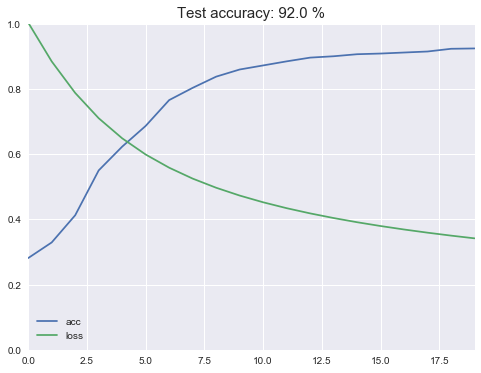

In [16]:
history_df.plot(ylim=(0,1), figsize=(8,6))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

In [17]:
model.metrics_names

['loss', 'acc']

# Learning Rates

In [18]:
hist_list = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=lr), metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=20)
    hist_list.append(pd.DataFrame(h.history, index=h.epoch))

In [19]:
history_df = pd.concat(hist_list, axis=1)
metrics_reported = hist_list[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported])
history_df.columns = idx

In [20]:
history_df.head()

0.01                0.05                0.10                0.50  \
        acc      loss       acc      loss       acc      loss       acc   
0  0.542708  0.945882  0.603125  0.696407  0.793750  0.475917  0.935417   
1  0.621875  0.709684  0.923958  0.373807  0.896875  0.316236  0.969792   
2  0.705208  0.556432  0.931250  0.291886  0.926042  0.247228  0.976042   
3  0.817708  0.464300  0.934375  0.251401  0.946875  0.204746  0.979167   
4  0.877083  0.408838  0.941667  0.224683  0.954167  0.176306  0.980208   

             
       loss  
0  0.228485  
1  0.118420  
2  0.091493  
3  0.077905  
4  0.069853

In [61]:
#history_df.xs('loss', axis=1, level=1)

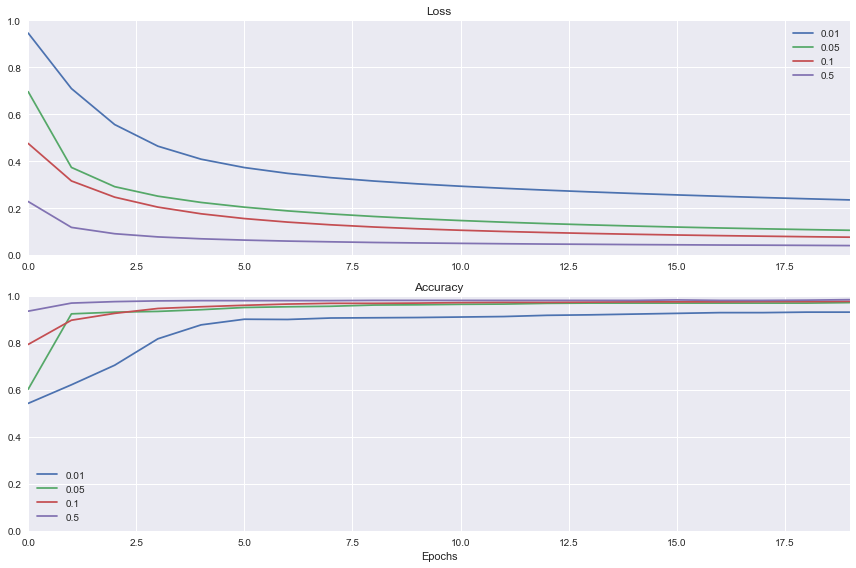

In [21]:
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
history_df.xs('loss', axis=1, level=1).plot(ylim=(0,1),ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
history_df.xs('acc', axis=1, level=1).plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

# Batch Sizes

In [22]:
hist_list = []

batch_sizes = [16,32,64,128]

for bs in batch_sizes:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=bs, verbose=0, epochs=20)
    hist_list.append(pd.DataFrame(h.history, index=h.epoch))

In [23]:
history_df = pd.concat(hist_list, axis=1)
metrics_reported = hist_list[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported], names=['batch_size', 'metric'])
history_df.columns = idx

In [24]:
history_df.head()

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.253125  0.993851  0.428125  1.208528  0.317708  1.043040   
1           0.380208  0.792574  0.458333  1.046588  0.354167  0.987393   
2           0.626042  0.660613  0.494792  0.906257  0.377083  0.936244   
3           0.784375  0.572691  0.531250  0.788880  0.401042  0.889260   
4           0.837500  0.511094  0.600000  0.693566  0.437500  0.846151   

batch_size       128            
metric           acc      loss  
0           0.511458  0.754328  
1           0.516667  0.743465  
2           0.519792  0.732982  
3           0.525000  0.722800  
4           0.533333  0.713123

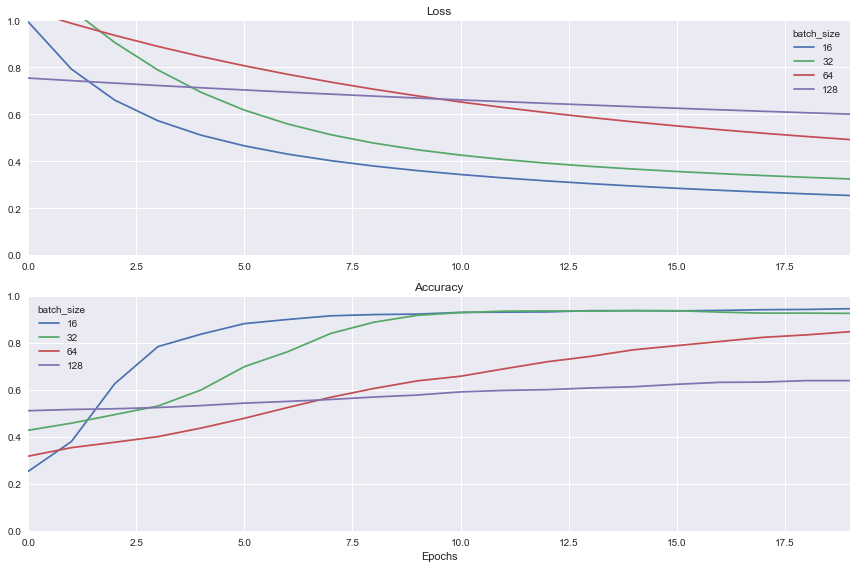

In [25]:
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
history_df.xs('loss', axis=1, level=1).plot(ylim=(0,1),ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
history_df.xs('acc', axis=1, level=1).plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

# Exponential Weighted Moving Average (EWMA)
### Recursive mixing and Smoothing

### Optimizers
* SGD 
* SGD with momentum (smooth updates)
* SGD with Nesterov momentum (interim calc gradient + smooth)

Adaptive Algorithms
* AdaGrad (Adaptive correction using Squared Gradient)
* RMSProp (EWMA applied to squared gradient adagrad)
* Adam (Adaptive, use EWMA on graient and square of gradient moments)

In [26]:
dflist = []

optimizers = ['SGD(lr=0.01)', 
              'SGD(lr=0.01, momentum=0.3)',
             'SGD(lr=0.01, momentum=0.3, nesterov=True)',
             'Adam(lr=0.01)',
             'Adagrad(lr=0.01)',
             'RMSprop(lr=0.01)']

for opt_name in optimizers:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=eval(opt_name), metrics=['accuracy']) # use eval() since you are passing a funct
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=20)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [27]:
history_df = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported], names=['optimizer', 'metric'])
history_df.columns = idx

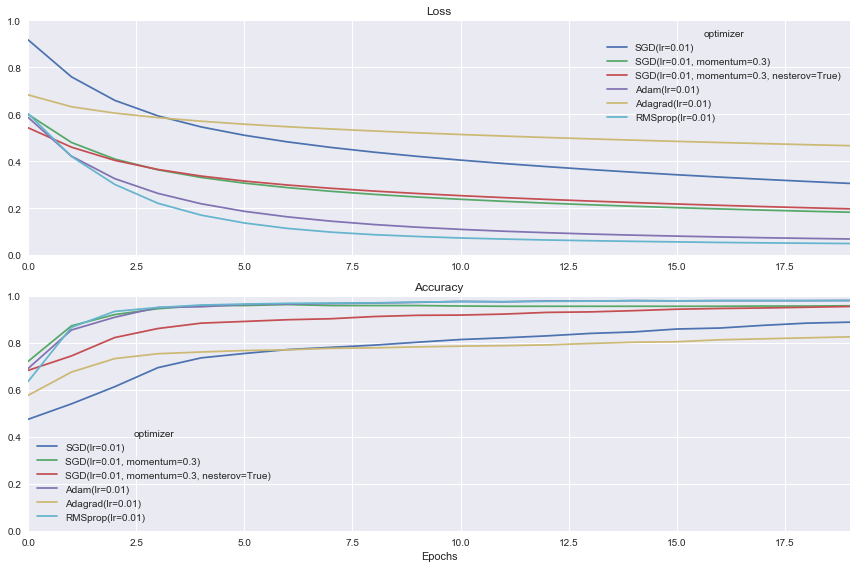

In [28]:
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
history_df.xs('loss', axis=1, level=1).plot(ylim=(0,1),ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
history_df.xs('acc', axis=1, level=1).plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

# Initialization
https://keras.io/initializers

In [29]:
dflist = []

initializers = ['zeros',
               'uniform',
               'normal',
               'he_normal', 
               'lecun_uniform']

for init in initializers:
    K.clear_session()
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=20)
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [30]:
history_df = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported], names=['initializer', 'metric'])
history_df.columns = idx

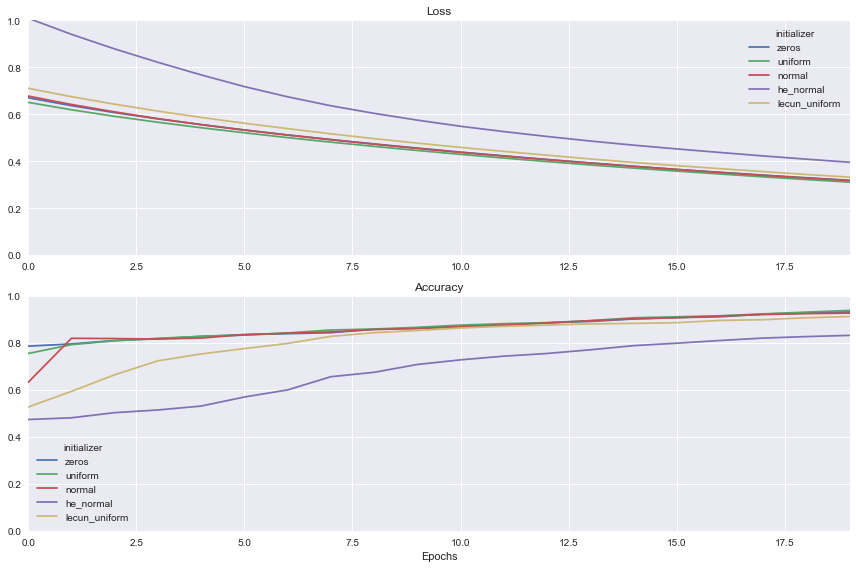

In [31]:
plt.figure(figsize=(12,8))
ax = plt.subplot(211)
history_df.xs('loss', axis=1, level=1).plot(ylim=(0,1),ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
history_df.xs('acc', axis=1, level=1).plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.tight_layout()

# Inner layer representation

In [32]:
K.clear_session()
model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.01), metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.6480 - acc: 0.5640 - val_loss: 0.5883 - val_acc: 0.5590
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.4503 - acc: 0.7083 - val_loss: 0.3854 - val_acc: 0.9410
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.2972 - acc: 0.9464 - val_loss: 0.2672 - val_acc: 0.9688
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.2046 - acc: 0.9717 - val_loss: 0.1808 - val_acc: 0.9722
Epoch 5/20
672/672 [==============================] - 0s - loss: 0.1347 - acc: 0.9807 - val_loss: 0.1100 - val_acc: 0.9861
Epoch 6/20
672/672 [==============================] - 0s - loss: 0.0887 - acc: 0.9881 - val_loss: 0.0735 - val_acc: 0.9896
Epoch 7/20
672/672 [==============================] - 0s - loss: 0.0636 - acc: 0.9896 - val_loss: 0.0531 - val_acc: 0.9896
Epoch 8/20
672/672 [==============================] - 0s - loss: 0.0500 - acc: 0.9896 - val_l

In [33]:
result

[0.022998888063633326, 0.99271844660194175]

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.layers

In [36]:
inp = model.layers[0].input
out = model.layers[0].output

In [37]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [38]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [39]:
features_function = K.function([inp], [out])

In [40]:
features_function

In [41]:
features_function([X_test])[0].shape

(412, 2)

In [42]:
features = features_function([X_test])[0]

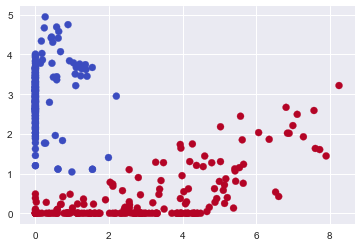

In [43]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [44]:
h.history.keys()

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])

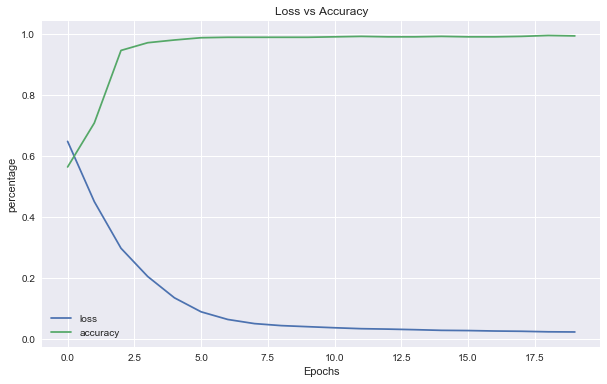

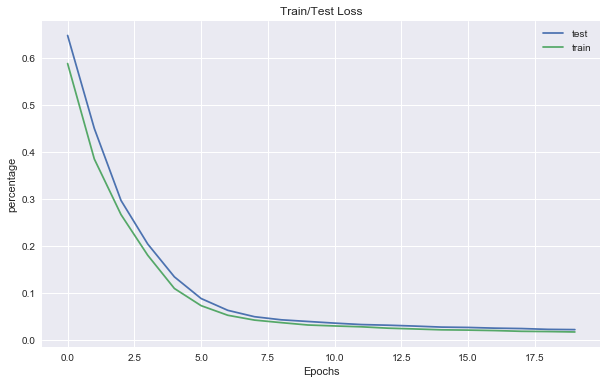

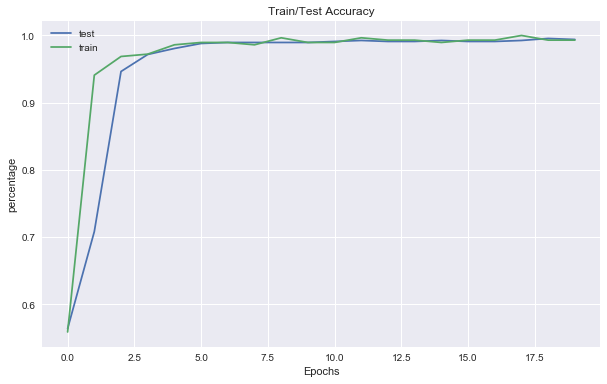

In [45]:
plt.figure(figsize=(10,6))
plt.plot(h.history['loss'])
plt.plot(h.history['acc'])
plt.xlabel("Epochs")
plt.ylabel("percentage")
plt.legend(['loss', 'accuracy'])
plt.title("Loss vs Accuracy")

plt.figure(figsize=(10,6))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("percentage")
plt.legend(['test', 'train'])
plt.title("Train/Test Loss")

plt.figure(figsize=(10,6))
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.xlabel("Epochs")
plt.ylabel("percentage")
plt.legend(['test', 'train'])
plt.title("Train/Test Accuracy")

In [46]:
K.clear_session()
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.01),metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

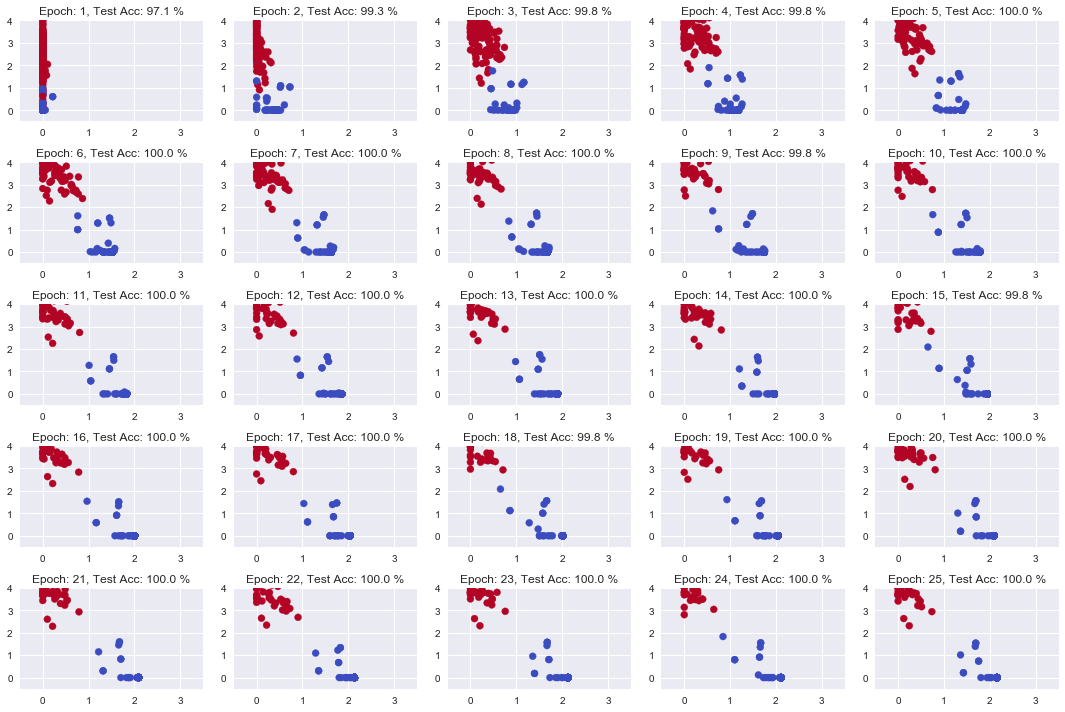

In [47]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [48]:
df = pd.read_csv('../data/wines.csv')

In [49]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
y = df['Class']

In [51]:
X = df.drop('Class', axis=1)

In [52]:
y = pd.get_dummies(y)

In [53]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [54]:
print(X.shape)
print(y.shape)

(178, 13)
(178, 3)


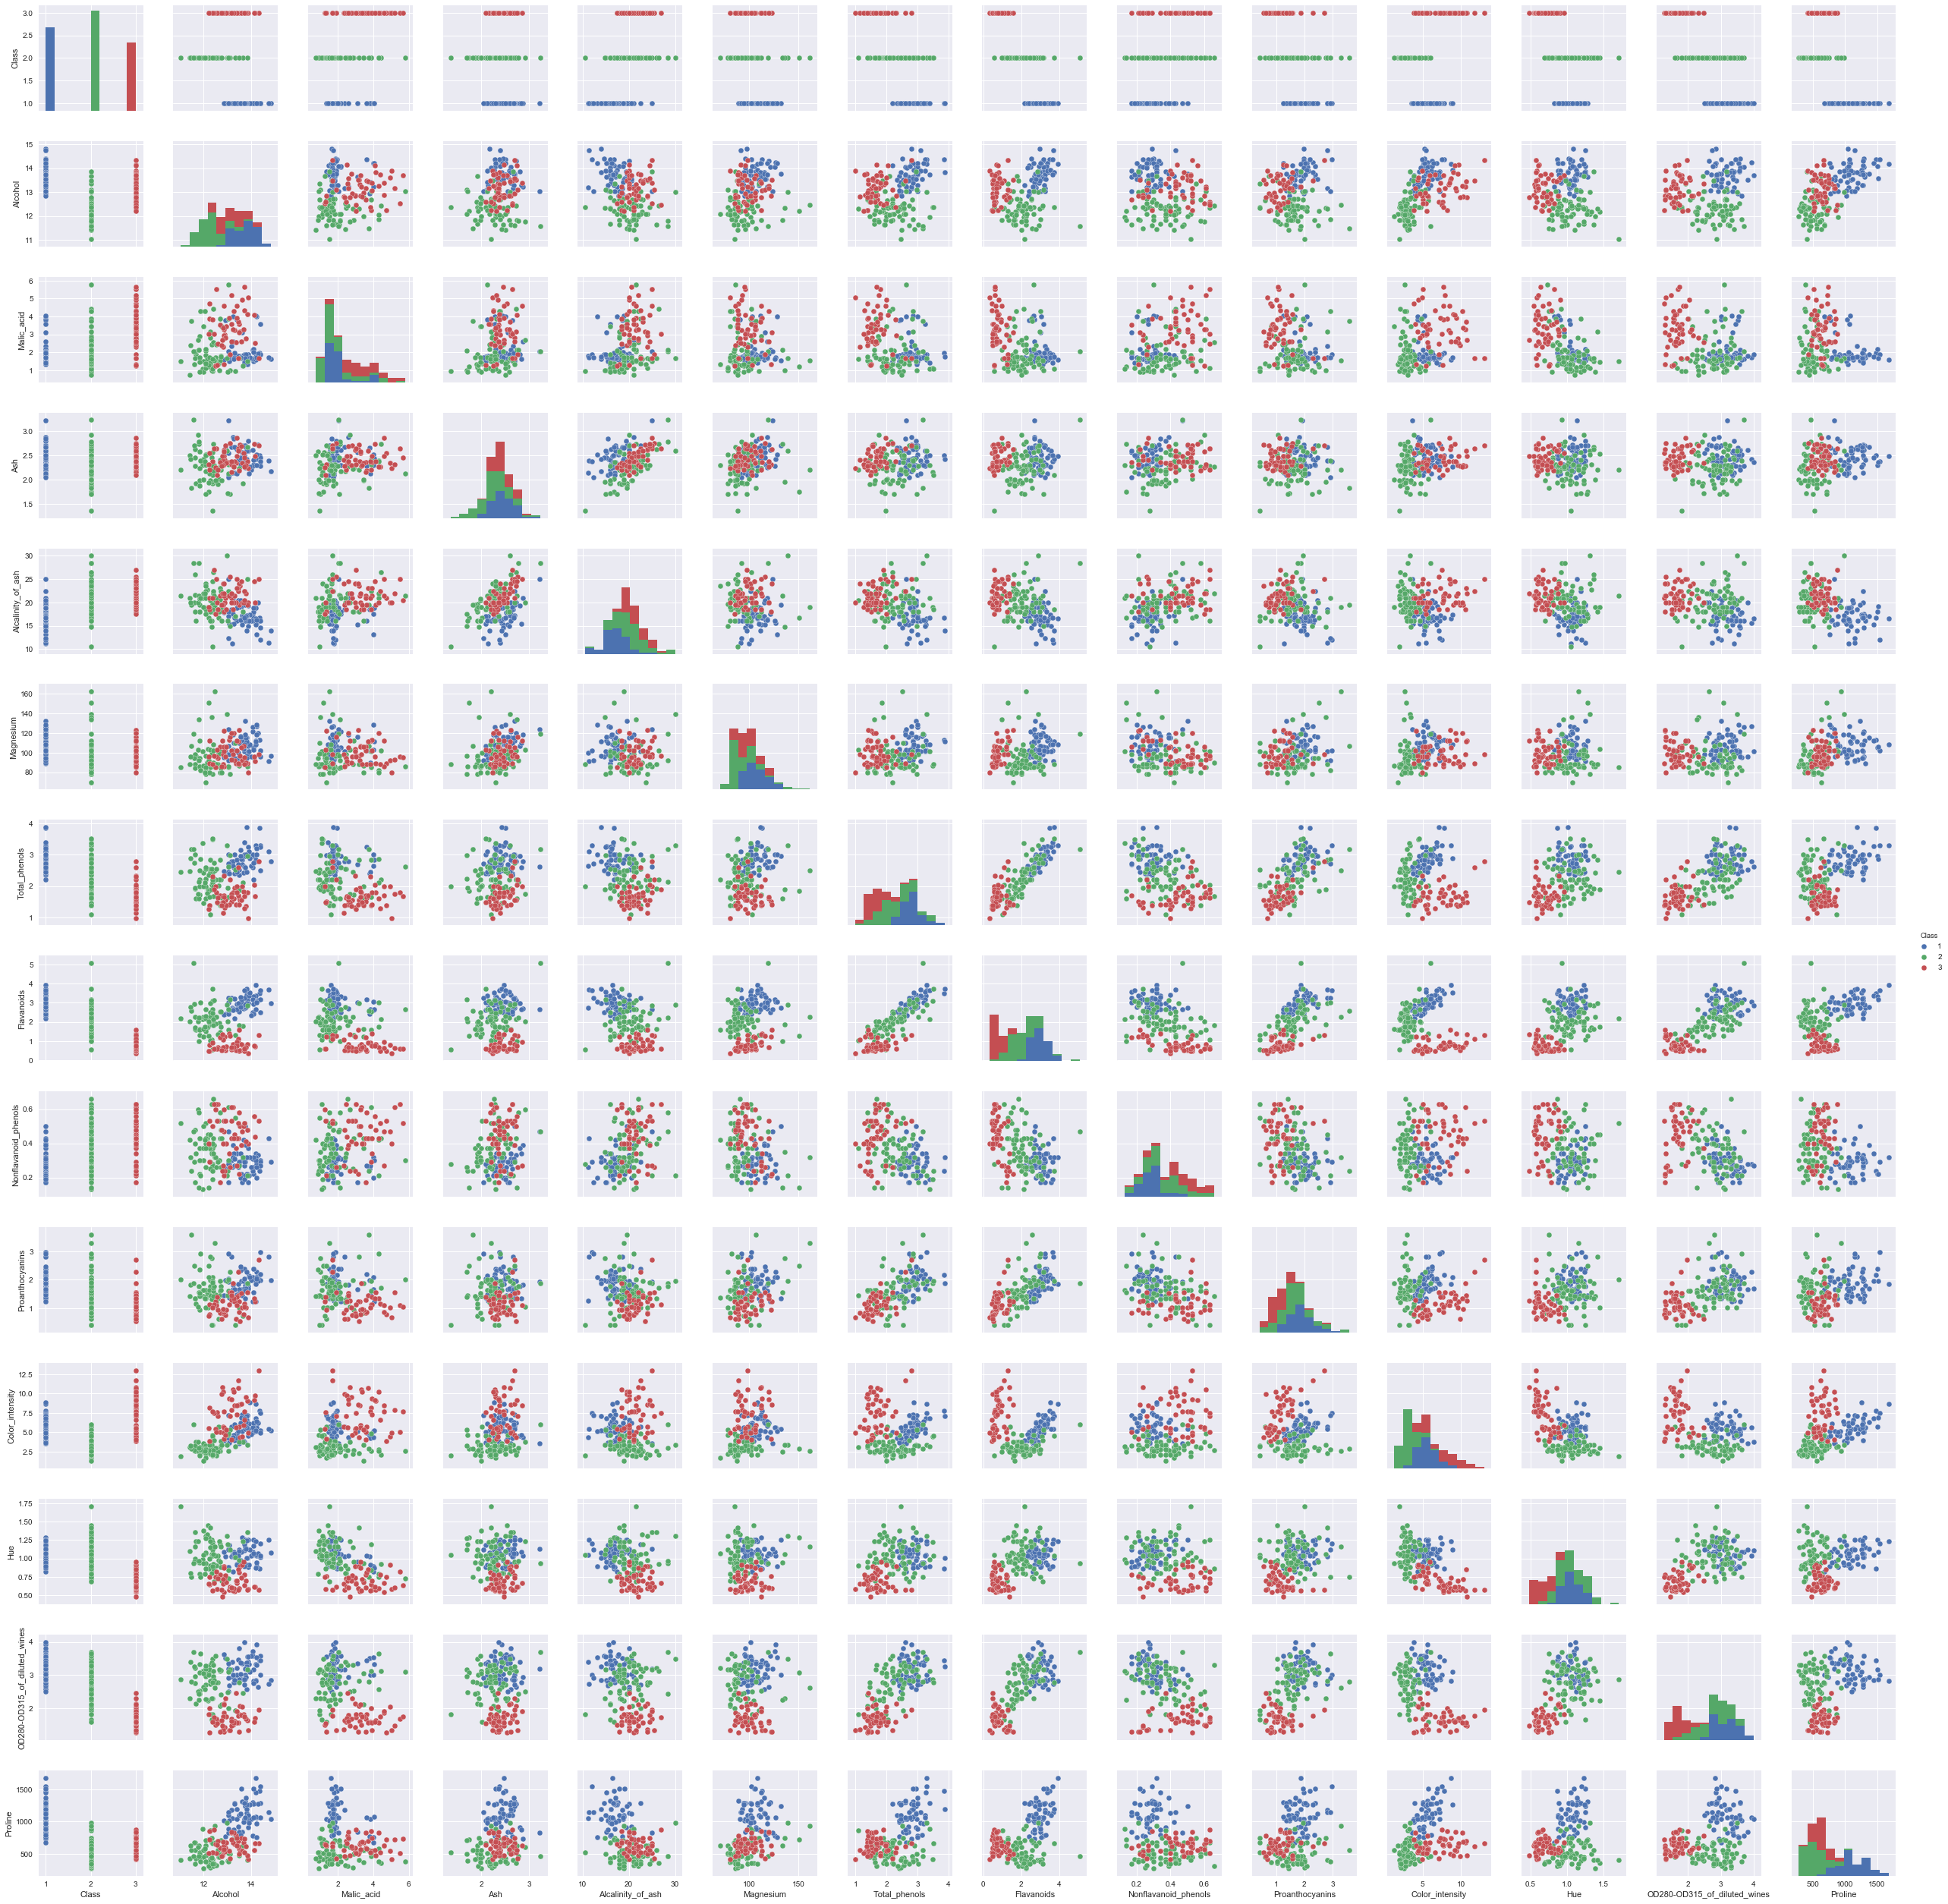

In [55]:
sns.pairplot(df, hue='Class')

In [93]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=42)

In [94]:
print(X_train.shape)
print(y_train.shape)

(142, 13)
(142, 3)


In [95]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,), kernel_initializer='lecun_uniform', activation='relu'))
model.add(Dense(4, kernel_initializer='lecun_uniform', activation='relu'))
model.add(Dense(2, kernel_initializer='lecun_uniform', activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.01), metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=8, epochs=20, verbose=1, validation_split=0.2)
result = model.evaluate(X_test, y_test)

Train on 113 samples, validate on 29 samples
Epoch 1/20
113/113 [==============================] - 0s - loss: 0.9561 - acc: 0.3894 - val_loss: 0.7846 - val_acc: 0.8621
Epoch 2/20
113/113 [==============================] - 0s - loss: 0.6819 - acc: 0.8230 - val_loss: 0.5635 - val_acc: 0.8966
Epoch 3/20
113/113 [==============================] - 0s - loss: 0.4484 - acc: 0.9469 - val_loss: 0.3042 - val_acc: 0.9655
Epoch 4/20
113/113 [==============================] - 0s - loss: 0.2532 - acc: 0.9646 - val_loss: 0.1628 - val_acc: 0.9655
Epoch 5/20
113/113 [==============================] - 0s - loss: 0.1497 - acc: 0.9735 - val_loss: 0.0957 - val_acc: 0.9655
Epoch 6/20
113/113 [==============================] - 0s - loss: 0.0786 - acc: 0.9912 - val_loss: 0.0807 - val_acc: 0.9655
Epoch 7/20
113/113 [==============================] - 0s - loss: 0.0644 - acc: 0.9823 - val_loss: 0.0393 - val_acc: 1.0000
Epoch 8/20
113/113 [==============================] - 0s - loss: 0.0376 - acc: 0.9823 - val_lo

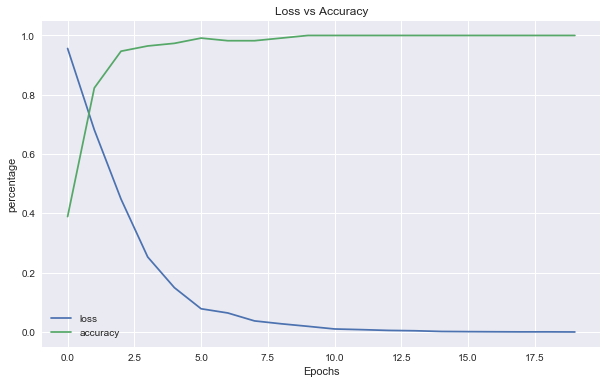

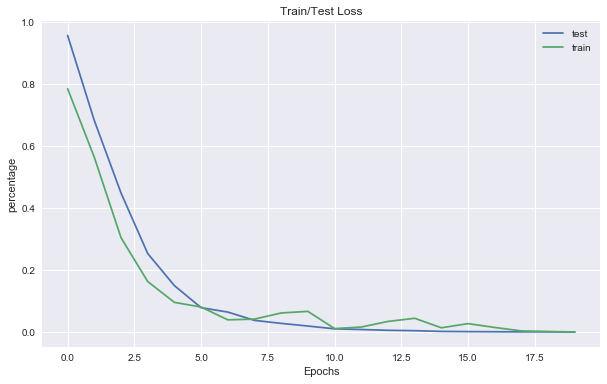

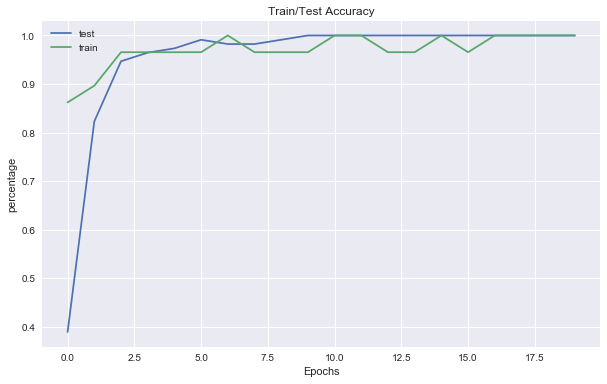

In [96]:
def plot_history(h):
    plt.figure(figsize=(10,6))
    plt.plot(h.history['loss'])
    plt.plot(h.history['acc'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['loss', 'accuracy'])
    plt.title("Loss vs Accuracy")

    plt.figure(figsize=(10,6))
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['test', 'train'])
    plt.title("Train/Test Loss")

    plt.figure(figsize=(10,6))
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['test', 'train'])
    plt.title("Train/Test Accuracy")
plot_history(h)

In [106]:
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
print('\n')
print(confusion_matrix(y_true, y_pred))
print('\n')
print(classification_report(y_true, y_pred))

32/36 [=========================>....] - ETA: 0s

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        36



### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?

In [107]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,), kernel_initializer='lecun_uniform', activation='tanh'))
model.add(Dense(5, kernel_initializer='lecun_uniform', activation='tanh'))
model.add(Dense(2, kernel_initializer='lecun_uniform', activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.01), metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=8, epochs=20, verbose=1, validation_split=0.2)
result = model.evaluate(X_test, y_test)

Train on 113 samples, validate on 29 samples
Epoch 1/20
113/113 [==============================] - 0s - loss: 0.9061 - acc: 0.5752 - val_loss: 0.6878 - val_acc: 0.6552
Epoch 2/20
113/113 [==============================] - 0s - loss: 0.6940 - acc: 0.6726 - val_loss: 0.5428 - val_acc: 0.7586
Epoch 3/20
113/113 [==============================] - 0s - loss: 0.5603 - acc: 0.7345 - val_loss: 0.4139 - val_acc: 0.9655
Epoch 4/20
113/113 [==============================] - 0s - loss: 0.4156 - acc: 0.9469 - val_loss: 0.3191 - val_acc: 1.0000
Epoch 5/20
113/113 [==============================] - 0s - loss: 0.3092 - acc: 0.9735 - val_loss: 0.2662 - val_acc: 1.0000
Epoch 6/20
113/113 [==============================] - 0s - loss: 0.2421 - acc: 0.9823 - val_loss: 0.1999 - val_acc: 1.0000
Epoch 7/20
113/113 [==============================] - 0s - loss: 0.1779 - acc: 0.9912 - val_loss: 0.1886 - val_acc: 0.9655
Epoch 8/20
113/113 [==============================] - 0s - loss: 0.1326 - acc: 1.0000 - val_lo

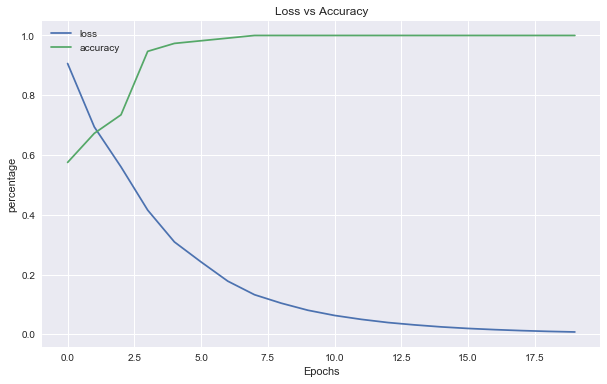

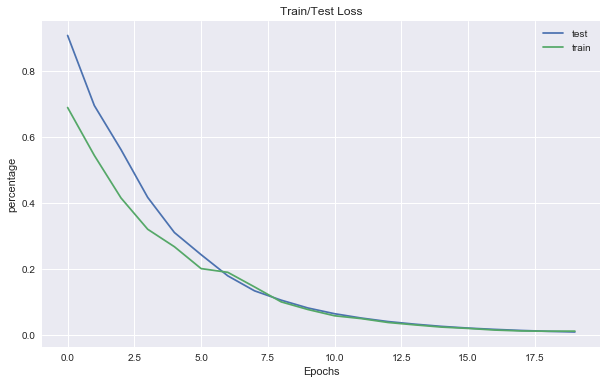

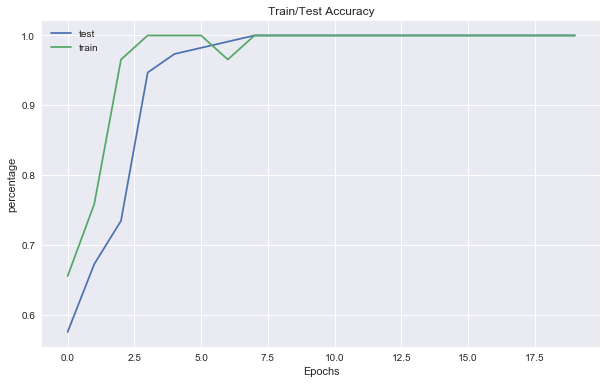

In [108]:
def plot_history(h):
    plt.figure(figsize=(10,6))
    plt.plot(h.history['loss'])
    plt.plot(h.history['acc'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['loss', 'accuracy'])
    plt.title("Loss vs Accuracy")

    plt.figure(figsize=(10,6))
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['test', 'train'])
    plt.title("Train/Test Loss")

    plt.figure(figsize=(10,6))
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['test', 'train'])
    plt.title("Train/Test Accuracy")
plot_history(h)

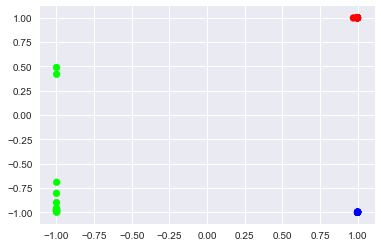

In [109]:
inp = model.layers[0].input # 1st layer
out = model.layers[2].output # 3rd layer
features_function = K.function([inp], [out])
features = features_function([X_test])[0]
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [110]:
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
print('\n')
print(confusion_matrix(y_true, y_pred))
print('\n')
print(classification_report(y_true, y_pred))

32/36 [=========================>....] - ETA: 0s

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        36



### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [65]:
# imported up top
# from keras.layers import Input
# from keras.models import Model

In [128]:
K.clear_session()
inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='lecun_uniform', activation='relu')(inputs)
x = Dense(5, kernel_initializer='lecun_uniform', activation='relu')(x)
second_to_last = Dense(2, kernel_initializer='lecun_uniform', activation='relu')(x)
outputs = outputs = Dense(3, activation='softmax')(second_to_last)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=RMSprop(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_split=0.2, verbose=1)

Train on 113 samples, validate on 29 samples
Epoch 1/20
113/113 [==============================] - 0s - loss: 0.9610 - acc: 0.4425 - val_loss: 1.0125 - val_acc: 0.4138
Epoch 2/20
113/113 [==============================] - 0s - loss: 0.7938 - acc: 0.6018 - val_loss: 0.8309 - val_acc: 0.6207
Epoch 3/20
113/113 [==============================] - 0s - loss: 0.7168 - acc: 0.6726 - val_loss: 0.7309 - val_acc: 0.6207
Epoch 4/20
113/113 [==============================] - 0s - loss: 0.6726 - acc: 0.7080 - val_loss: 0.7069 - val_acc: 0.6207
Epoch 5/20
113/113 [==============================] - 0s - loss: 0.6329 - acc: 0.6903 - val_loss: 0.6438 - val_acc: 0.6207
Epoch 6/20
113/113 [==============================] - 0s - loss: 0.5894 - acc: 0.7080 - val_loss: 0.6362 - val_acc: 0.6207
Epoch 7/20
113/113 [==============================] - 0s - loss: 0.5592 - acc: 0.6991 - val_loss: 0.5556 - val_acc: 0.6552
Epoch 8/20
113/113 [==============================] - 0s - loss: 0.4954 - acc: 0.7080 - val_lo

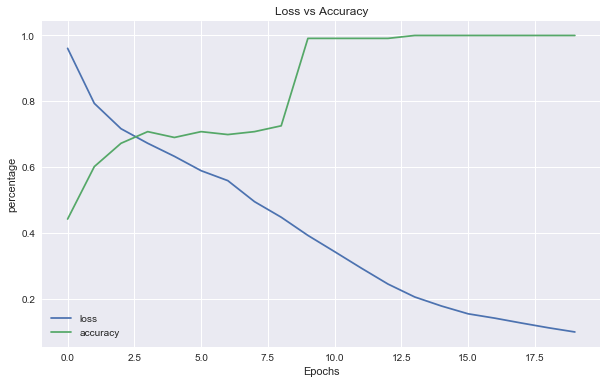

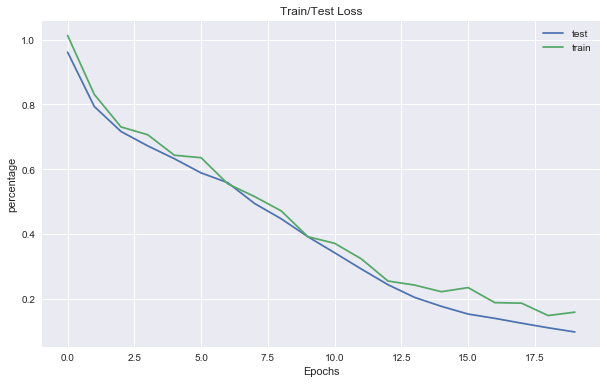

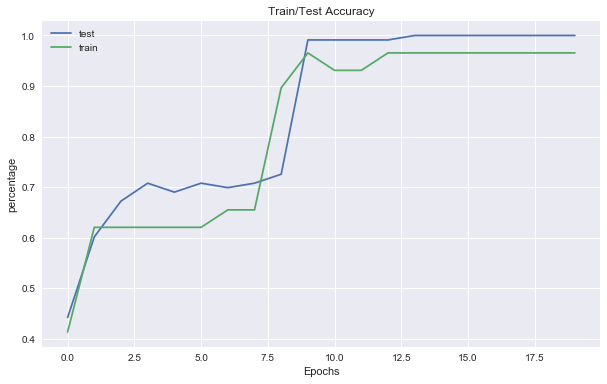

In [129]:
def plot_history(h):
    plt.figure(figsize=(10,6))
    plt.plot(h.history['loss'])
    plt.plot(h.history['acc'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['loss', 'accuracy'])
    plt.title("Loss vs Accuracy")

    plt.figure(figsize=(10,6))
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['test', 'train'])
    plt.title("Train/Test Loss")

    plt.figure(figsize=(10,6))
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    plt.xlabel("Epochs")
    plt.ylabel("percentage")
    plt.legend(['test', 'train'])
    plt.title("Train/Test Accuracy")
plot_history(h)

In [130]:
features_function = K.function([inputs], [second_to_last]) # define a function between inputs and second_to_last layer

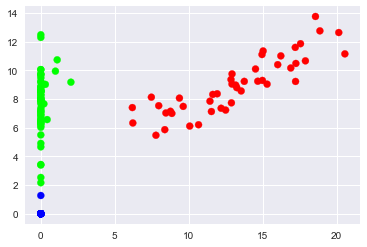

In [131]:
features = features_function([X_train])[0]
plt.scatter(features[:, 0], features[:, 1], c=y_train)

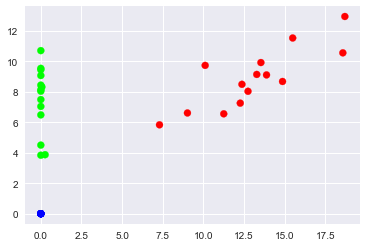

In [132]:
features = features_function([X_test])[0]
plt.scatter(features[:, 0], features[:, 1], c=y_test)

In [133]:
y_pred = model.predict(X_test).argmax(axis=-1) 
y_true = np.argmax(y_test, axis=1)
print('\n')
print(confusion_matrix(y_true, y_pred))
print('\n')
print(classification_report(y_true, y_pred))



[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        36



### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [83]:
# called up top
# from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [134]:
checkpointer = ModelCheckpoint(filepath="weights.hdf5",verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=1, mode='auto')
tensorboard = TensorBoard(log_dir='./tensorboard/')

In [135]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)

In [136]:
K.clear_session()
inputs = Input(shape=(13,))
x = Dense(8, kernel_initializer='lecun_uniform', activation='relu')(inputs)
x = Dense(5, kernel_initializer='lecun_uniform', activation='relu')(x)
second_to_last = Dense(2, kernel_initializer='lecun_uniform', activation='relu')(x)
outputs = outputs = Dense(3, activation='softmax')(second_to_last)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=RMSprop(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=2,
              validation_data=(X_test, y_test), callbacks=[checkpointer, earlystopper, tensorboard])

Train on 124 samples, validate on 54 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.76148, saving model to weights.hdf5
0s - loss: 0.9421 - acc: 0.5000 - val_loss: 0.7615 - val_acc: 0.6481
Epoch 2/20
Epoch 00001: val_loss improved from 0.76148 to 0.50853, saving model to weights.hdf5
0s - loss: 0.6140 - acc: 0.7258 - val_loss: 0.5085 - val_acc: 0.7963
Epoch 3/20
Epoch 00002: val_loss improved from 0.50853 to 0.41526, saving model to weights.hdf5
0s - loss: 0.4500 - acc: 0.8548 - val_loss: 0.4153 - val_acc: 0.8333
Epoch 4/20
Epoch 00003: val_loss improved from 0.41526 to 0.35658, saving model to weights.hdf5
0s - loss: 0.3695 - acc: 0.8952 - val_loss: 0.3566 - val_acc: 0.9259
Epoch 5/20
Epoch 00004: val_loss improved from 0.35658 to 0.31007, saving model to weights.hdf5
0s - loss: 0.3238 - acc: 0.9435 - val_loss: 0.3101 - val_acc: 0.9630
Epoch 6/20
Epoch 00005: val_loss improved from 0.31007 to 0.27189, saving model to weights.hdf5
0s - loss: 0.2776 - acc: 0.9597 - val_

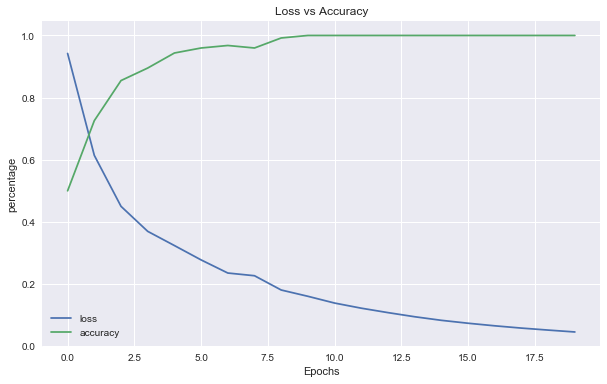

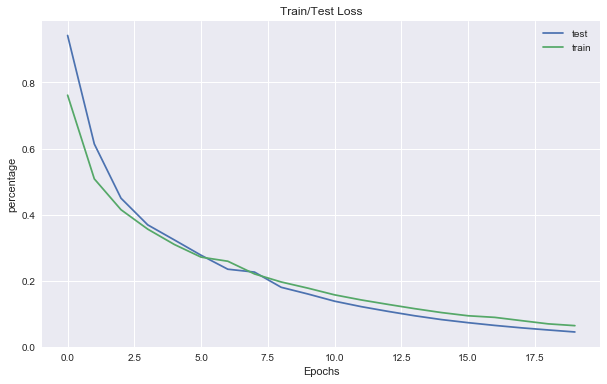

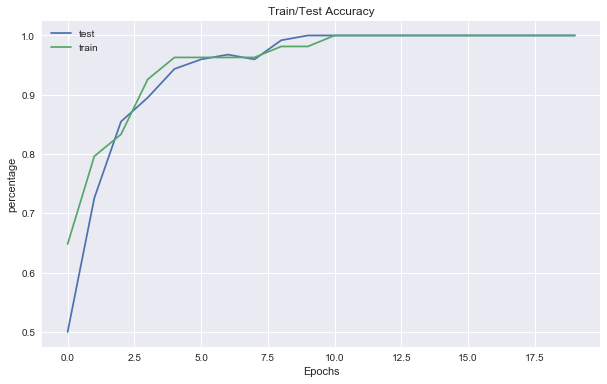

In [137]:
plot_history(h)

In [92]:
!tensorboard --logdir ./tensorboard/

Starting TensorBoard b'47' at http://0.0.0.0:6006
(Press CTRL+C to quit)
^C


In [138]:
y_pred = model.predict(X_test).argmax(axis=-1) 
y_true = np.argmax(y_test, axis=1)
print('\n')
print(confusion_matrix(y_true, y_pred))
print('\n')
print(classification_report(y_true, y_pred))



[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        21
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        54

